In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Correlated but not affected by the treatment

- Vars su Loggati e Abbonati (Users, Pvs, Pages/Session, Avg Time on Page, Avg Page Load Time)

In [17]:
corr_df = pd.read_excel('Provacorr.xlsx',
                        sheet_name = 'Dataset1')
corr_df.head()

,Date,PVsMinisito,Users,Pageviews,Pages / Session,Avg. Time on Page,Avg. Page Load Time (sec)
0,2023-01-01,245,6132,44879,3.743348,186.060747,2.409541
1,2023-01-02,303,6661,51903,4.122230,187.576616,3.744219
2,2023-01-03,284,6842,57203,4.375994,188.053585,3.589595
3,2023-01-04,380,6470,58494,4.657907,190.193599,3.457605
4,2023-01-05,287,6709,59175,4.601120,180.470340,3.512864


In [33]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       166 non-null    datetime64[ns]
 1   PVsMinisito                166 non-null    int64         
 2   Users                      166 non-null    int64         
 3   Pageviews                  166 non-null    int64         
 4   Pages / Session            166 non-null    float64       
 5   Avg. Time on Page          166 non-null    float64       
 6   Avg. Page Load Time (sec)  166 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 9.2 KB


C:\Users\Andrea Buscemi\AppData\Local\Temp\ipykernel_12204\3269466440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_df.corr(),


<Axes: >

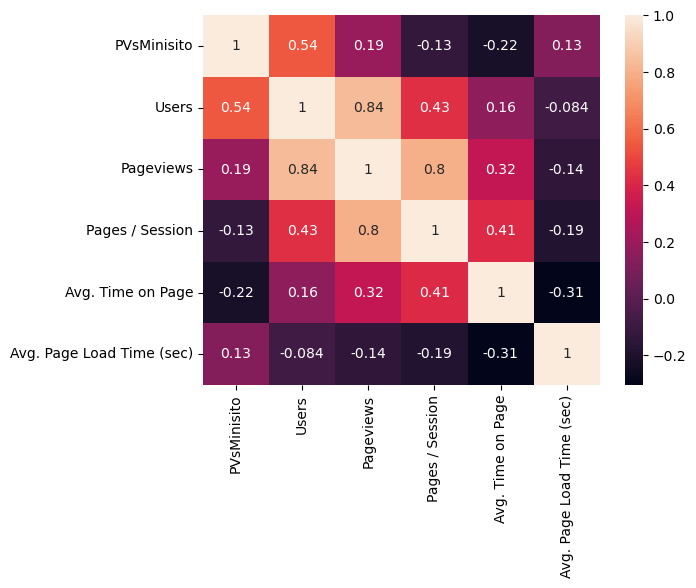

In [19]:
sns.heatmap(corr_df.corr(),
            yticklabels=True,
            annot=True)

In [30]:
date_range = pd.date_range(start="2023-01-01", periods=166)
ts_data = corr_df.copy()
ts_data.index = date_range
ts_data.tail()

,Date,PVsMinisito,Users,Pageviews,Pages / Session,Avg. Time on Page,Avg. Page Load Time (sec)
2023-06-11,2023-06-11,384,7093,47688,3.782960,168.965130,4.002991
2023-06-12,2023-06-12,564,9737,77070,4.229271,194.405064,3.741434
2023-06-13,2023-06-13,462,8377,72635,4.692790,186.747757,2.709085
2023-06-14,2023-06-14,435,8078,70995,4.523415,175.067590,4.620554
2023-06-15,2023-06-15,488,8004,67774,4.522789,175.739748,3.348551


In [31]:
ts_pre_period = [pd.to_datetime(date) for date in ["2023-01-01", "2023-06-04"]]
ts_post_period = [pd.to_datetime(date) for date in ["2023-06-05", "2023-06-15"]]

In [37]:
ts_data.index = ts_data["Date"]
ts_data.drop("Date", axis=1, inplace=True)
ts_data.head()

,PVsMinisito,Users,Pageviews,Pages / Session,Avg. Time on Page,Avg. Page Load Time (sec)
Date,,,,,,
2023-01-01,245,6132,44879,3.743348,186.060747,2.409541
2023-01-02,303,6661,51903,4.122230,187.576616,3.744219
2023-01-03,284,6842,57203,4.375994,188.053585,3.589595
2023-01-04,380,6470,58494,4.657907,190.193599,3.457605
2023-01-05,287,6709,59175,4.601120,180.470340,3.512864


In [27]:
from causalimpact import CausalImpact

In [39]:
ts_impact = CausalImpact(ts_data, ts_pre_period, ts_post_period)

c:\Users\Andrea Buscemi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Andrea Buscemi\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\Users\Andrea Buscemi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


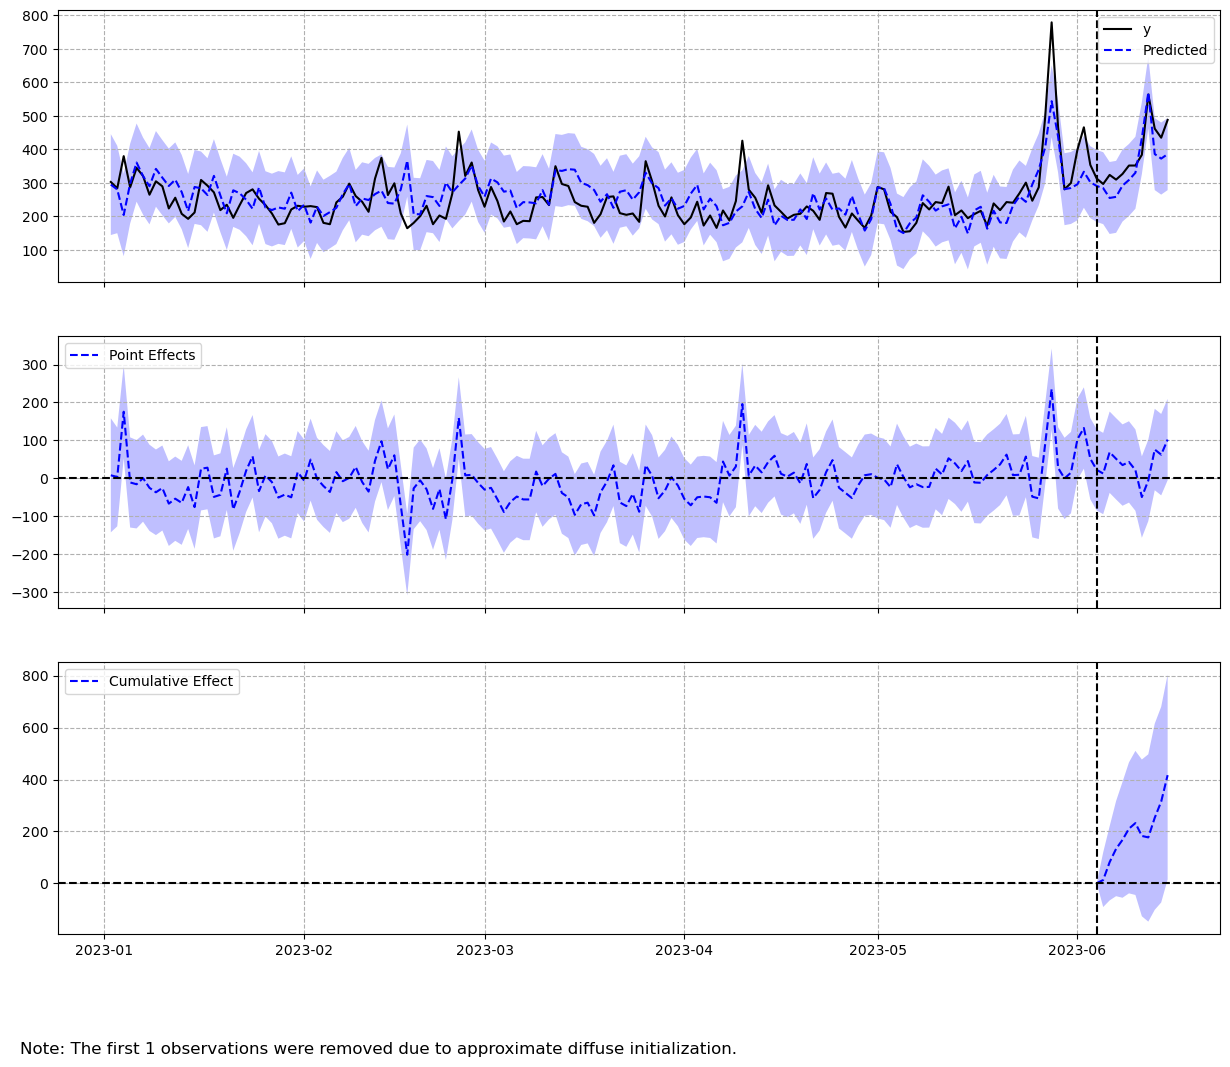

In [40]:
ts_impact.plot()

In [47]:
print(ts_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    390.45             4295.0
Prediction (s.d.)         352.56 (18.33)     3878.16 (201.6)
95% CI                    [317.3, 389.14]    [3490.3, 4280.56]

Absolute effect (s.d.)    37.89 (18.33)      416.84 (201.6)
95% CI                    [1.31, 73.15]      [14.44, 804.7]

Relative effect (s.d.)    10.75% (5.2%)      10.75% (5.2%)
95% CI                    [0.37%, 20.75%]    [0.37%, 20.75%]

Posterior tail-area probability p: 0.02
Posterior prob. of a causal effect: 97.8%

For more details run the command: print(impact.summary('report'))


In [48]:
print(ts_impact.summary(output='report',digits = 100))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 390.45454545454544. By contrast, in the absence of an
intervention, we would have expected an average response of 352.5601084852844.
The 95% interval of this counterfactual prediction is [317.3003266662424, 389.1414075868107].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 37.89443696926105 with a 95% interval of
[1.3131378677347243, 73.15421878830301]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4295.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 3878.161193338128. The 95% interval of this prediction is [3490.3035933286665